# Data Collection Notebook
## Objectives
Fetch data from Kaggle and save it as raw data.
Inspect the data and save it under outputs/datasets/collection
## Inputs
Kaggle JSON file - the authentication token.
## Outputs
Generate Dataset: outputs/datasets/collection/HousePrices.csv


In [2]:
%matplotlib inline

# Change working directory

We need to change the working directory from its current folder to its parent folder



In [3]:
import os
current_dir = os.getcwd()
current_dir

'/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices/notebooks'

We want to make the parent of the current directory the new current directory



In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory



In [5]:
current_dir = os.getcwd()
current_dir

'/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices'

## Fetch data from Kaggle

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

In [5]:
KaggleDatasetPath = "codeinstitute/housing-prices-data"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

housing-prices-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

Archive:  inputs/datasets/raw/housing-prices-data.zip
replace inputs/datasets/raw/house-metadata.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### 🔍 Data Loading and Initial Inspection

In this cell, we import the necessary libraries for data analysis and visualization, including `pandas`, `numpy`, `matplotlib`, `seaborn`, and `plotly`.  
We also apply basic styling for `matplotlib` and `seaborn` visualizations to improve readability.  
Then, we load the **house prices dataset** from a CSV file and display its shape and basic information to understand its structure and data types.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")


# Read the dataset
df = pd.read_csv("inputs/datasets/raw/house_prices_records.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.shape
df.info()




Dataset Shape: (1460, 24)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond

### 📊 Sale Price Distribution

This cell creates a histogram of the `SalePrice` column using Seaborn's `histplot` with a kernel density estimate (KDE) overlay.  
It helps visualize the distribution of house prices and detect skewness or outliers in the target variable.


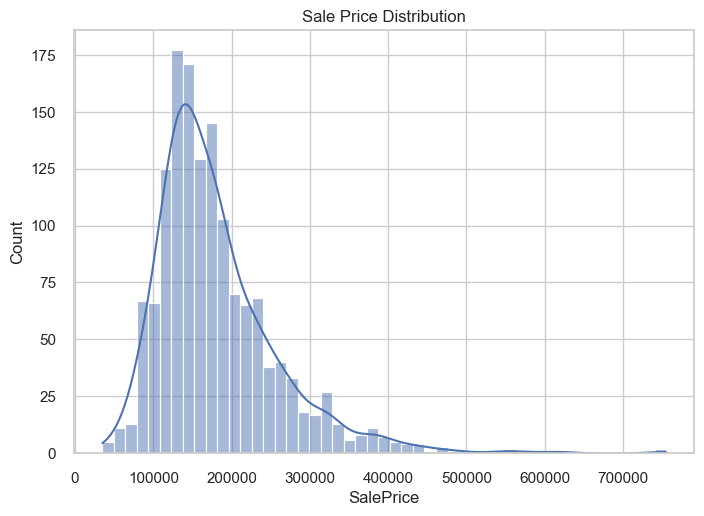

In [7]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()

### Save a Copy of Dataset

Creates a new directory (`outputs/datasets/collection`) if it doesn't already exist, and save the loaded dataset as a CSV file in that location.  
This ensures we have a reusable copy of the original data for further processing or sharing.


In [8]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create an output folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/house_prices_records.csv",index=False)

[Errno 17] File exists: 'outputs/datasets/collection'


## Dataset Summary

- The dataset contains **1,460 rows** and **24 features**. A manageable dataset size for a regression problem.

### Missing Values

| Feature         | Missing Count | % Missing |
|-----------------|----------------|------------|
| EnclosedPorch   | 1324           | 90.68%     |
| WoodDeckSF      | 1305           | 89.38%     |
| LotFrontage     | 259            | 17.74%     |
| GarageFinish    | 235            | 16.10%     |
| BsmtFinType1    | 145            | 9.93%      |
| BedroomAbvGr    | 99             | 6.78%      |
| 2ndFlrSF        | 86             | 5.89%      |
| GarageYrBlt     | 81             | 5.55%      |
| BsmtExposure    | 38             | 2.60%      |
| MasVnrArea      | 8              | 0.55%      |

### Key Observations

- **EnclosedPorch** and **WoodDeckSF** have over 85% missing values → likely not useful, dropping will be considered.
- **LotFrontage**, **GarageFinish**, and **BsmtFinType1** show moderate missingness → imputation or further investigation.
- Remaining features have minimal missingness → can likely be handled with simple imputation (e.g., median or mode or non existent).

### Data Types

- The dataset contains a **mix of numerical and categorical features**.
- **Categorical examples**: `GarageFinish`, `BsmtExposure`, `BsmtFinType1`, `KitchenQual`.
- **Target variable**: `SalePrice` → numerical, appropriate for regression tasks.


## Conclusion

In this phase, we successfully uploaded the dataset and conducted an initial inspection of its structure. We examined the number of variables and gained a general understanding of the data's content and format. This provides a solid foundation for the next steps in our data science workflow.

## Next Steps

- Perform exploratory data analysis (EDA) to better understand distributions and relationships.
- Identify correlations and patterns between variables.
- Select relevant variables to focus on for modeling.
- Begin feature engineering to enhance the dataset.
- Prepare the data for training machine learning models.
